# 1.1 Importações

In [2]:
import pandas as pd

# 1.2.1 Leitura de dados

In [3]:
df = pd.read_csv('../data/raw/imoveis_bh.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 100 non-null    int64  
 1   Area (m2)          100 non-null    int64  
 2   Quartos            99 non-null     float64
 3   Banheiros          100 non-null    int64  
 4   Vagas de Garagem   100 non-null    int64  
 5   Bairro             100 non-null    object 
 6   Andar              69 non-null     float64
 7   Preco (R$)         100 non-null    int64  
 8   Tipo de Imovel     100 non-null    object 
 9   Ano de Construcao  100 non-null    int64  
 10  Observacoes        10 non-null     object 
dtypes: float64(2), int64(6), object(3)
memory usage: 8.7+ KB


# 1.2.2 Renomeando as colunas

In [4]:
df.rename(columns={ 
    'ID': 'id',
    'Area (m2)' : 'area_m2',
    'Quartos' : 'quartos',
    'Banheiros' : 'banheiros',
    'Vagas de Garagem' : 'vagas_garagem',
    'Bairro' : 'bairro',
    'Andar' : 'andar',
    'Preco (R$)' : 'preco',
    'Tipo de Imovel' : 'tipo_imovel',
    'Ano de Construcao' : 'ano_construcao',
    'Observacoes' : 'observacoes'
}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              100 non-null    int64  
 1   area_m2         100 non-null    int64  
 2   quartos         99 non-null     float64
 3   banheiros       100 non-null    int64  
 4   vagas_garagem   100 non-null    int64  
 5   bairro          100 non-null    object 
 6   andar           69 non-null     float64
 7   preco           100 non-null    int64  
 8   tipo_imovel     100 non-null    object 
 9   ano_construcao  100 non-null    int64  
 10  observacoes     10 non-null     object 
dtypes: float64(2), int64(6), object(3)
memory usage: 8.7+ KB


# 1.3 Análise Estática Descritiva

In [5]:
df.describe()

,id,area_m2,quartos,banheiros,vagas_garagem,andar,preco,ano_construcao
count,100.000000,100.000000,99.000000,100.00000,100.000000,69.000000,1.000000e+02,100.000000
mean,50.500000,181.960000,3.494949,2.96000,2.170000,5.420290,1.980300e+06,2011.230000
std,29.011492,105.657434,1.319970,1.49017,1.310833,2.625698,1.533718e+06,6.422585
min,1.000000,55.000000,1.000000,1.00000,0.000000,1.000000,4.000000e+05,1990.000000
25%,25.750000,95.000000,2.000000,2.00000,1.000000,3.000000,8.500000e+05,2007.000000
50%,50.500000,150.000000,3.000000,3.00000,2.000000,5.000000,1.425000e+06,2012.000000
75%,75.250000,251.250000,4.000000,4.00000,3.000000,7.000000,2.712500e+06,2017.000000
max,100.000000,450.000000,7.000000,7.00000,6.000000,12.000000,9.500000e+06,2020.000000


# 1.4 Tratamento de dados nulos

In [6]:
df.isnull().sum()

id                 0
area_m2            0
quartos            1
banheiros          0
vagas_garagem      0
bairro             0
andar             31
preco              0
tipo_imovel        0
ano_construcao     0
observacoes       90
dtype: int64

In [7]:
df = df.drop('observacoes', axis=1)

In [8]:
mediana_quartos = df['quartos'].median()
df['quartos'].fillna(mediana_quartos, inplace=True)

df['andar'].fillna(0, inplace=True)

C:\Users\mtand\AppData\Local\Temp\ipykernel_20868\983033095.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['quartos'].fillna(mediana_quartos, inplace=True)
C:\Users\mtand\AppData\Local\Temp\ipykernel_20868\983033095.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

# 1.5 Transformando float em inteiros

In [9]:
df['quartos'] = df['quartos'].astype(int)
df['andar'] = df['andar'].astype(int)

# 1.6 Tratamento de outliers

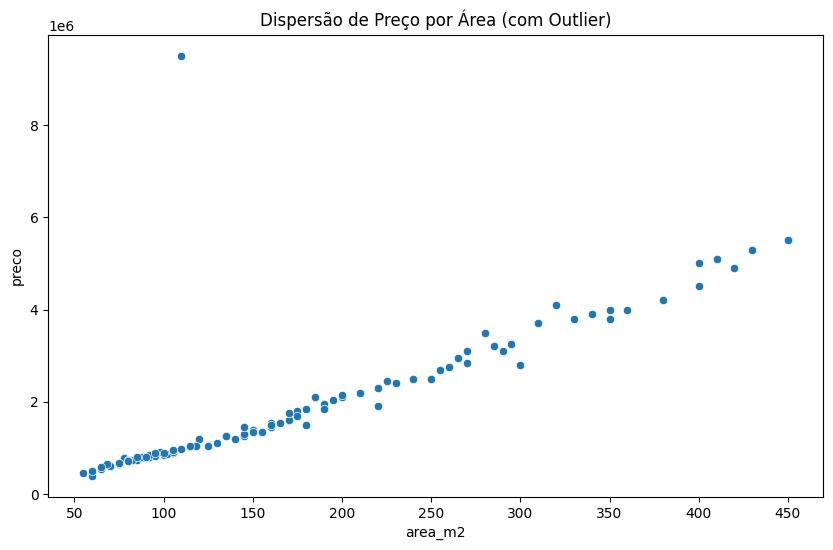

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='area_m2', y='preco')
plt.title('Dispersão de Preço por Área (com Outlier)')
plt.show()

In [11]:
df = df[df['preco'] < 9500000]

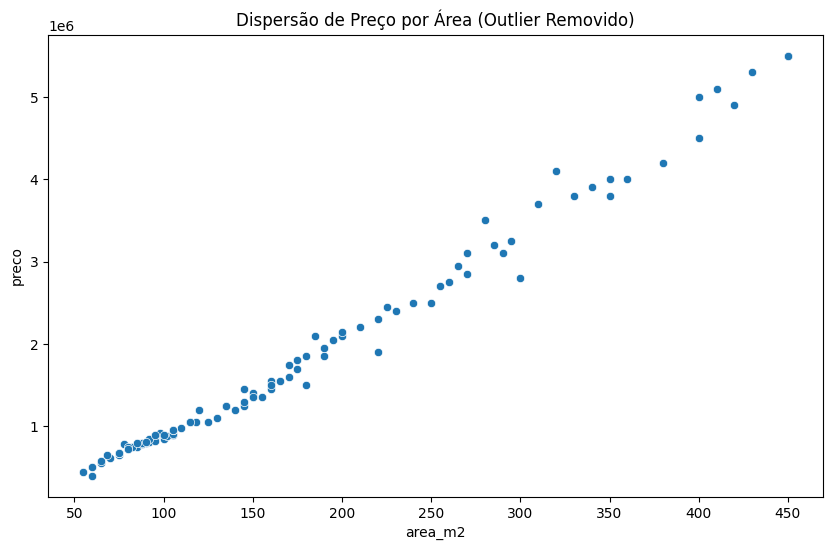

In [12]:
df.isnull().sum()

df.describe()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='area_m2', y='preco')
plt.title('Dispersão de Preço por Área (Outlier Removido)')
plt.show()

# 1.7 Verificação final

In [13]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 0 to 99
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              99 non-null     int64 
 1   area_m2         99 non-null     int64 
 2   quartos         99 non-null     int64 
 3   banheiros       99 non-null     int64 
 4   vagas_garagem   99 non-null     int64 
 5   bairro          99 non-null     object
 6   andar           99 non-null     int64 
 7   preco           99 non-null     int64 
 8   tipo_imovel     99 non-null     object
 9   ano_construcao  99 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 8.5+ KB


,id,area_m2,quartos,banheiros,vagas_garagem,andar,preco,ano_construcao
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,9.900000e+01,99.000000
mean,50.888889,182.686869,3.494949,2.969697,2.181818,3.767677,1.904343e+06,2011.151515
std,28.895974,105.943540,1.319970,1.494579,1.312138,3.334508,1.339203e+06,6.406890
min,1.000000,55.000000,1.000000,1.000000,0.000000,0.000000,4.000000e+05,1990.000000
25%,26.500000,95.000000,2.000000,2.000000,1.000000,0.000000,8.500000e+05,2007.000000
50%,51.000000,150.000000,3.000000,3.000000,2.000000,4.000000,1.400000e+06,2012.000000
75%,75.500000,252.500000,4.000000,4.000000,3.000000,6.000000,2.600000e+06,2016.500000
max,100.000000,450.000000,7.000000,7.000000,6.000000,12.000000,5.500000e+06,2020.000000


# 1.8 Exportando como csv os dados limpos

In [14]:
df.to_csv('../data/processed/imoveis_bh_cleaned.csv', index=False)